## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import utils
import sklearn
from sklearn.preprocessing import LabelEncoder
import pickle as pkl

## Modelos ##
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Métricas ##
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, multilabel_confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.multiclass import OneVsRestClassifier

## Datos

In [5]:
ruta = "C:\\Users\\Usuario\\Desktop\\The Bridge\\Data Analytics y ML\Mio\ML - Trabajo final\\src\\data\\raw\\students_adaptability_level_online_education.csv"
data = pd.read_csv(ruta)
data_df = pd.DataFrame(data)

## EDA

In [6]:
data_df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [7]:
# Miramos el tamaño del dataframe

data_df.shape

(1205, 14)

In [8]:
# Chequeamos si hay elementos nulos

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [9]:
# Para más certeza, se llama a la función "missing_zero_values_table" para crer un df con toda la info sobre 
# los valores nulos

# from utils import missing_zero_values_table

# missing_zero_values_table(data_df)

In [10]:
# Chequeamos que todas las columnas tengan más de un valor

for i in data_df.columns:
    print(i, data_df[i].unique())
    print("---")

Gender ['Boy' 'Girl']
---
Age ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
---
Education Level ['University' 'College' 'School']
---
Institution Type ['Non Government' 'Government']
---
IT Student ['No' 'Yes']
---
Location ['Yes' 'No']
---
Load-shedding ['Low' 'High']
---
Financial Condition ['Mid' 'Poor' 'Rich']
---
Internet Type ['Wifi' 'Mobile Data']
---
Network Type ['4G' '3G' '2G']
---
Class Duration ['3-6' '1-3' '0']
---
Self Lms ['No' 'Yes']
---
Device ['Tab' 'Mobile' 'Computer']
---
Adaptivity Level ['Moderate' 'Low' 'High']
---


In [11]:
# Vemos los tipos de valores que tiene el dataframe 

data_df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [12]:
# Chequeamos que no haya duplicados. Igualmente, no tengo ninguna columna con todos valores únicos para confirmar
# que sean efectivamente elementos duplicados, por lo que no puedo eliminar ninguno

data_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1200     True
1201     True
1202     True
1203     True
1204     True
Length: 1205, dtype: bool

In [13]:
data_df.astype('object').describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [14]:
# Se realiza una descripción rápida de la que será la variable target - "Adaptivity Level"
data_df["Adaptivity Level"].describe()

count         1205
unique           3
top       Moderate
freq           625
Name: Adaptivity Level, dtype: object

In [15]:
data_df["Adaptivity Level"].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

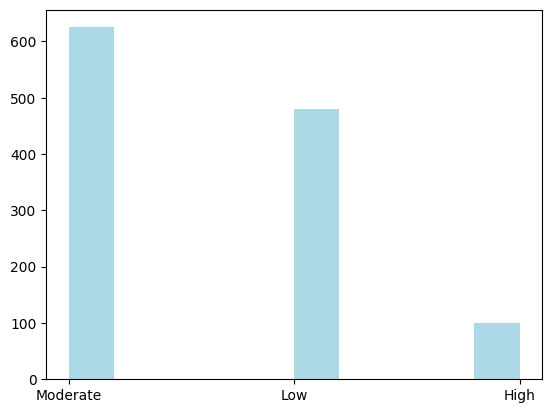

In [16]:
# Graficamos y vemos su distribución

plt.hist(data_df["Adaptivity Level"], color='lightblue')
plt.show()

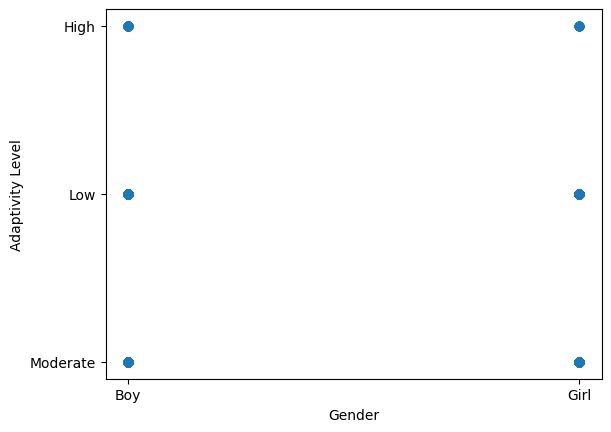

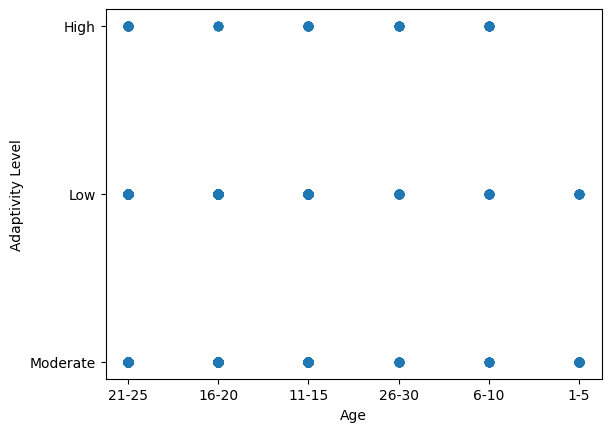

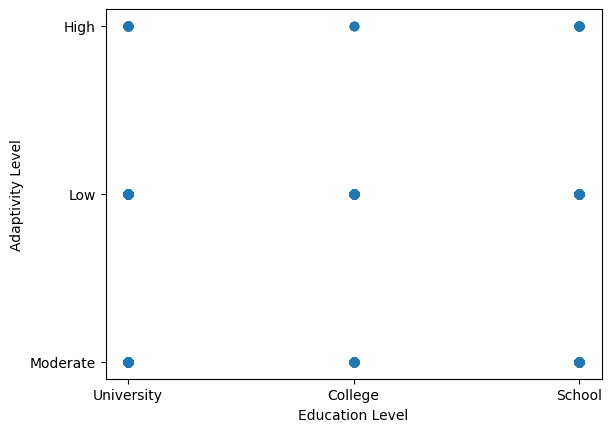

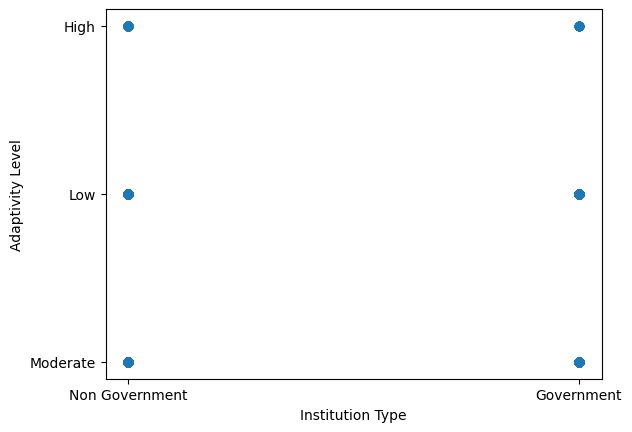

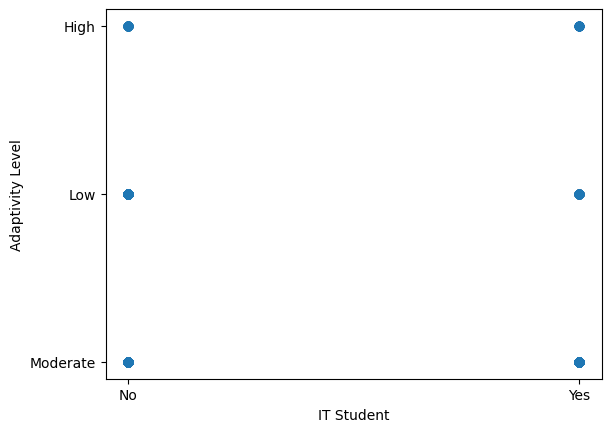

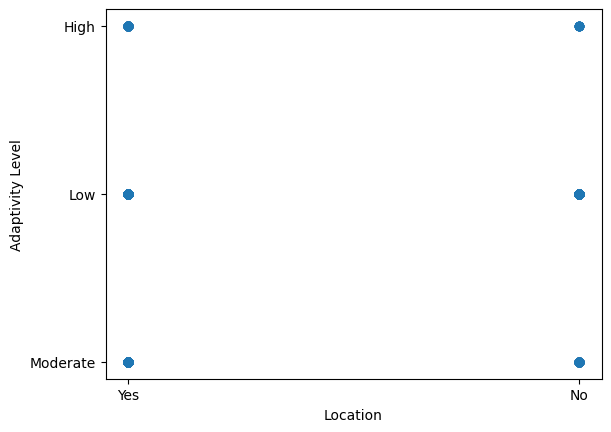

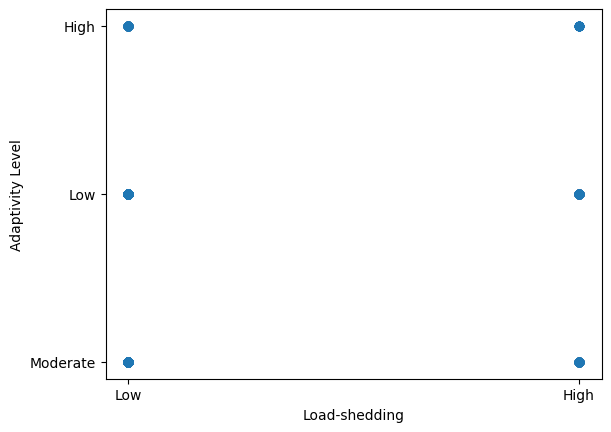

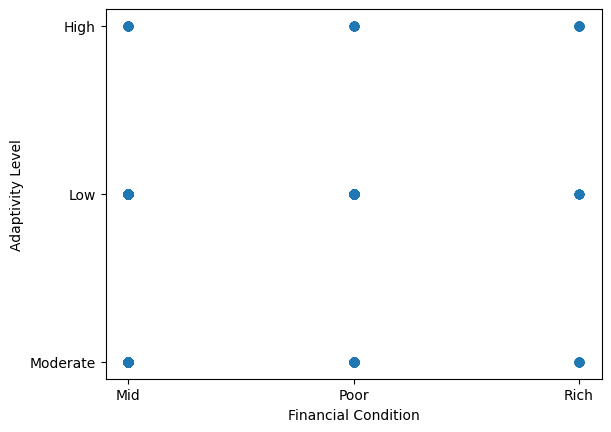

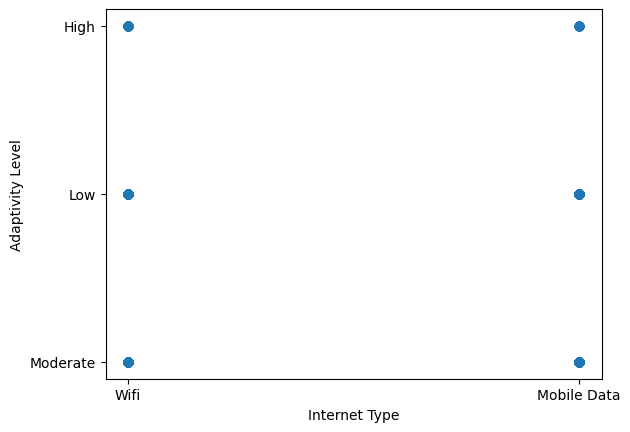

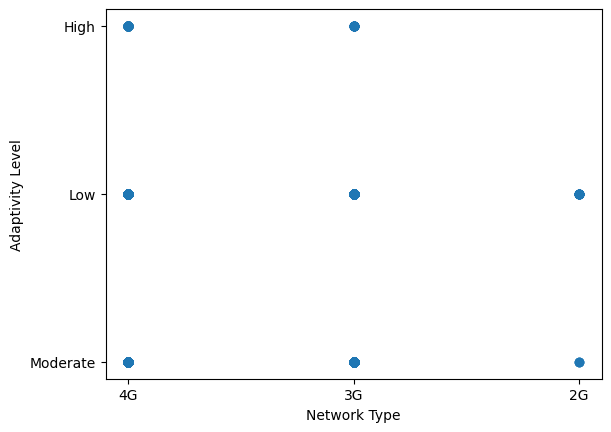

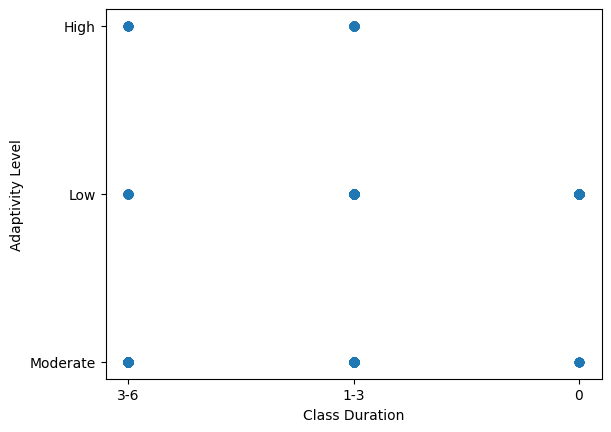

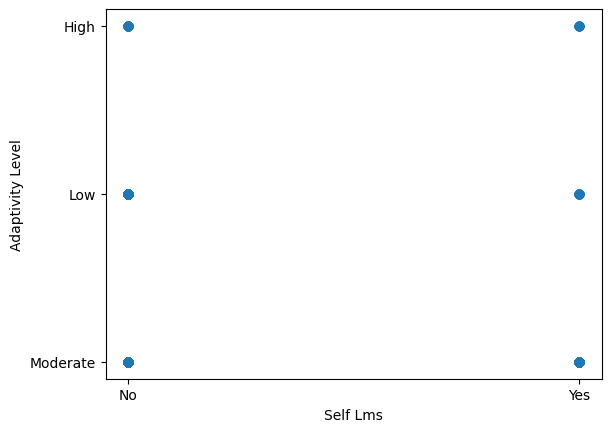

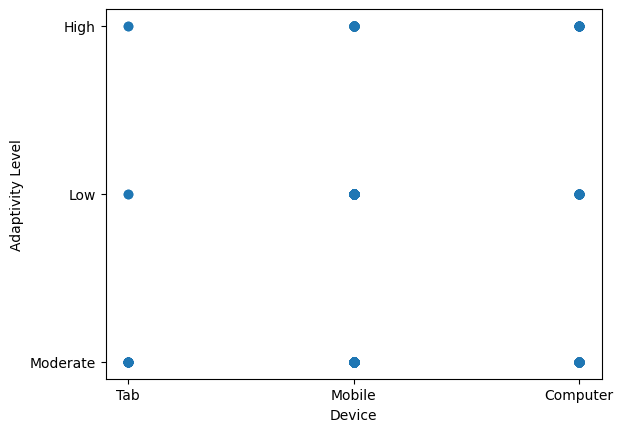

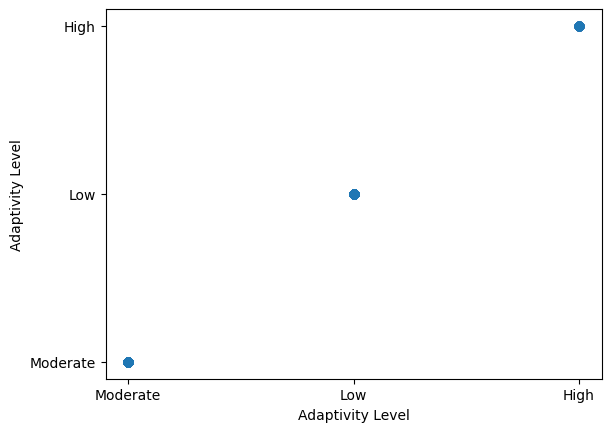

In [17]:
from utils import relation_target

relation_target(data_df)

In [18]:
# Los resultados nos muestran que ningun estudiante con un "Network type" de 2G logra un nivel de adaptación alto, lo 
# cual es información muy relevante. A su vez, lo mimso sucede con estudiantes con edad entre 1 y 5 años.

In [19]:
# Luego de analizar todas las variables, se consideró que ninguna columna debe ser eliminada. Las variables "Location" y 
# "Self Lms" fueron analizadas con mayor detenimiento, pero ambas aportan información valiosa; la primera refiere a 
# si el estudiante reside dentro de la ciudad o en las afueras, mientras que la segunda hace referencia a si el centro
# de estudio en cuestión tiene un "Learning Management System" (LMS) propio. El LMS es una aplicación de software o 
# tecnología basada en la web que se utiliza para planificar, implementar y evaluar un proceso de aprendizaje específico.


In [20]:
data_df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [21]:
# Comenzamos a transformar las variables a numéricas para poder incluirlas en el modelo, a través del método de pandas 
# pd.get_dummies

data_df["Gender"] = data_df["Gender"].apply(lambda x: 1 if x == "Boy" else 0)

In [22]:
age_dummies = pd.get_dummies(data=data_df["Age"])
data_df = pd.concat([data_df, age_dummies], axis=1)
data_df.drop(["Age"], axis=1, inplace=True)

In [23]:
education_level_dummies = pd.get_dummies(data=data_df["Education Level"])
data_df = pd.concat([data_df, education_level_dummies], axis=1)
data_df.drop(["Education Level"], axis=1, inplace=True)

In [24]:
data_df["Institution Type"] = data_df["Institution Type"].apply(lambda x: 1 if x == "Non Government" else 0)

In [25]:
data_df["IT Student"] = data_df["IT Student"].apply(lambda x: 1 if x == "Yes" else 0)

In [26]:
data_df["Location"] = data_df["Location"].apply(lambda x: 1 if x == "Yes" else 0)

In [27]:
data_df["Load-shedding"] = data_df["Load-shedding"].apply(lambda x: 1 if x == "High" else 0)

In [28]:
financial_dummies = pd.get_dummies(data=data_df["Financial Condition"])
data_df = pd.concat([data_df, financial_dummies], axis=1)
data_df.drop(["Financial Condition"], axis=1, inplace=True)

In [29]:
data_df["Internet Type"] = data_df["Internet Type"].apply(lambda x: 1 if x == "Wifi" else 0)

In [30]:
network_dummies = pd.get_dummies(data=data_df["Network Type"])
data_df = pd.concat([data_df, network_dummies], axis=1)
data_df.drop(["Network Type"], axis=1, inplace=True)

In [31]:
duration_dummies = pd.get_dummies(data=data_df["Class Duration"])
data_df = pd.concat([data_df, duration_dummies], axis=1)
data_df.drop(["Class Duration"], axis=1, inplace=True)

In [32]:
data_df["Self Lms"] = data_df["Self Lms"].apply(lambda x: 1 if x == "Yes" else 0)

In [33]:
device_dummies = pd.get_dummies(data=data_df["Device"])
data_df = pd.concat([data_df, device_dummies], axis=1)
data_df.drop(["Device"], axis=1, inplace=True)

In [34]:
# Por último, reemplazo la variable target por elementos numéricos

data_df["Adaptivity Level"] = data_df["Adaptivity Level"].replace(["Low", "Moderate", "High"], [1,2,3])

In [35]:
data_df["Adaptivity Level"].unique()

array([2, 1, 3], dtype=int64)

In [36]:
data_df.dtypes.unique()

array([dtype('int64'), dtype('uint8')], dtype=object)

In [37]:
from utils import regression_multiclass

regression_multiclass(data_df)

DecisionTreeClassifier()
[[[199  19]
  [ 12 132]]

 [[150  16]
  [ 19 177]]

 [[337   3]
  [  7  15]]]
The Cohen Kappa Score is 0.8064606899656706
---------------------
KNeighborsClassifier()
[[[186  32]
  [ 34 110]]

 [[127  39]
  [ 34 162]]

 [[333   7]
  [ 10  12]]]
The Cohen Kappa Score is 0.601085021615665
---------------------
GaussianNB()
[[[183  35]
  [ 74  70]]

 [[160   6]
  [175  21]]

 [[131 209]
  [  1  21]]]
The Cohen Kappa Score is 0.1427651271170387
---------------------
MultinomialNB()
[[[179  39]
  [ 72  72]]

 [[ 87  79]
  [ 46 150]]

 [[327  13]
  [ 13   9]]]
The Cohen Kappa Score is 0.31954887218045114
---------------------
BernoulliNB()
[[[177  41]
  [ 67  77]]

 [[ 99  67]
  [ 55 141]]

 [[316  24]
  [ 10  12]]]
The Cohen Kappa Score is 0.3408376096672736
---------------------
RandomForestClassifier()
[[[200  18]
  [ 13 131]]

 [[149  17]
  [ 18 178]]

 [[337   3]
  [  7  15]]]
The Cohen Kappa Score is 0.8061770839204193
---------------------
LogisticRegression()

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()
[[  0   0   0   0]
 [131  13   0   0]
 [ 15 178   3   0]
 [  3   5  14   0]]
---------------------


In [38]:
# Los modelos SVM y Logistic Regression pueden verse como los que presentan peores resultados. Esto se explica porque 
# dichos modelos fueron diseñados para clasificaciones binarias, por lo que no funcionan de forma correcta para 
# clasificaciones multiclase

In [39]:
X = data_df.drop(columns="Adaptivity Level")
y = data_df["Adaptivity Level"]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [41]:
# Con los hiperparámetros dados por defecto, los modelos que predicen mejor son el Decission Tree y el Random Forrest, 
# de acuerdo a la confusion matrix y el Cohen Kappa Score. 
# Basado en esto, se utlizará GridSearch para la optimización de los hiperparámetros para dichos modelo, con el fin de 
# mejorar las métricas

### Optimización hiperparámetros Random Forrest

In [42]:
# Random Forrest

forrest = RandomForestClassifier()
forrest.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred_forrest = forrest.predict(x_test)

In [44]:
print(forrest.__doc__)


    A random forest classifier.

    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : int, default=100
        The number of trees in the forest.

        .. versionchanged:: 0.22
           The default value of ``n_estimators`` changed from 10 to 100
           in 0.22.

    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.
 

In [45]:
forrest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [46]:
dicc_hiperparametros_forrest = {
                        "n_estimators":[50, 100, 150, 200],
                        "criterion":["gini", "entropy", "log_loss"],
                        "max_depth":[5, 10, 15, None],
                        "max_features":["sqrt", "log2", None],   
                        }

In [47]:
Ajuste_forrest = GridSearchCV(estimator = forrest,
            param_grid = dicc_hiperparametros_forrest)

In [48]:
Ajuste_forrest.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150, 200]})

In [49]:
Ajuste_forrest.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=15, n_estimators=50)

In [50]:
y_pred_ajust_forrest=Ajuste_forrest.predict(x_test)

In [51]:
print(multilabel_confusion_matrix(y_test, y_pred_forrest))
print(cohen_kappa_score(y_test, y_pred_forrest))

[[[199  19]
  [ 12 132]]

 [[150  16]
  [ 19 177]]

 [[337   3]
  [  7  15]]]
0.8064606899656706


In [52]:
print(multilabel_confusion_matrix(y_test, y_pred_ajust_forrest))
print(cohen_kappa_score(y_test, y_pred_ajust_forrest))

[[[200  18]
  [ 14 130]]

 [[148  18]
  [ 18 178]]

 [[337   3]
  [  7  15]]]
0.8009306260575296


### Optimización hiperparámetros Decision Tree

In [53]:
# Decision Tree

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred_tree = tree.predict(x_test)

In [55]:
print(tree.__doc__)

A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int or float, default=2
        The minimum number of samples required to split an internal node:

        - If int, then cons

In [56]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [57]:
dicc_hiperparametros_tree = {"max_depth":[4, 6, 8, None],
                        "splitter":["best", "random"],
                        "criterion":["gini", "entropy", "log_loss"],
                        "max_features":["auto", "sqrt", "log2", None], 
                        }


In [58]:
Ajuste_tree = GridSearchCV(estimator = tree,
            param_grid = dicc_hiperparametros_tree)

In [59]:
Ajuste_tree.fit(x_train,y_train)

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 6, 8, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']})

In [60]:
Ajuste_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random')

In [61]:
y_pred_ajust_tree = Ajuste_tree.predict(x_test)

In [62]:
print(multilabel_confusion_matrix(y_test, y_pred_tree))
print(cohen_kappa_score(y_test, y_pred_tree))

[[[199  19]
  [ 12 132]]

 [[150  16]
  [ 19 177]]

 [[337   3]
  [  7  15]]]
0.8064606899656706


In [63]:
print(multilabel_confusion_matrix(y_test, y_pred_ajust_tree))
print(cohen_kappa_score(y_test, y_pred_ajust_tree))

[[[199  19]
  [ 12 132]]

 [[149  17]
  [ 19 177]]

 [[337   3]
  [  8  14]]]
0.8008800880088008


In [64]:
# Los resultados indican que el modelo que predice mejor es el Decission Tree luego de la la optimización de parámetros 
# con el GridSearch. 
# Igualmente, lo que nos interesa más es la clasificación de la clase 3, referente a los estudiantes que tienen un nivel 
# de adaptación "High". Esto es así porque si se clasifica un estudiante con un alto nivel de adaptación, se le darán menos
# facilidades para su adaptación, lo cual puede significar una formación muy pobre o incluso el abandono a estudiar de 
# esa persona

In [65]:
# Vemos la importancia relativa de cada columna sobre la variable target

dict(zip(x_train, tree.feature_importances_))

{'Gender': 0.09450709655701237,
 'Institution Type': 0.04815549692862175,
 'IT Student': 0.03857005102385589,
 'Location': 0.06196381726738244,
 'Load-shedding': 0.05225585563581152,
 'Internet Type': 0.05000793982684231,
 'Self Lms': 0.06149074689213711,
 '1-5': 0.03212092133543042,
 '11-15': 0.0,
 '16-20': 0.049912089318476585,
 '21-25': 0.010288642203413467,
 '26-30': 0.011468759164971837,
 '6-10': 0.02158757132816661,
 'College': 0.044788433961894865,
 'School': 0.02786179021450025,
 'University': 0.01341941979644876,
 'Mid': 0.0,
 'Poor': 0.035525379659258255,
 'Rich': 0.05564962857279704,
 '2G': 0.009313790920424619,
 '3G': 0.023151051274705924,
 '4G': 0.02068850982431547,
 '0': 0.14471315587552716,
 '1-3': 0.02291919485655016,
 '3-6': 0.022405049991707896,
 'Computer': 0.02230388625712591,
 'Mobile': 0.024931721312621412,
 'Tab': 0.0}

In [66]:
# La única columna que tiene valor 0 es "Tab", por lo que se eliminará para ver el resultado en el scoring de la métrica

In [67]:
x_train_tab = x_train.drop(columns="Tab")
x_test_tab = x_test.drop(columns="Tab")

In [68]:
Ajuste_tree.fit(x_train_tab, y_train)

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 6, 8, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']})

In [69]:
y_pred_ajust_tree = Ajuste_tree.predict(x_test_tab)

In [70]:
print(multilabel_confusion_matrix(y_test, y_pred_ajust_tree))
print(cohen_kappa_score(y_test, y_pred_ajust_tree))

[[[199  19]
  [ 11 133]]

 [[151  15]
  [ 19 177]]

 [[337   3]
  [  7  15]]]
0.8116915982454167


In [71]:
# Luego de eliminar la columna "Tab", el scoring nos devuelve que la predicción pierde precisión, por lo que no
# se elimina dicha columna 

In [72]:
# predict proba - roc_auc_score - para investigar

### OneVsRest

In [73]:
modelo_multiclase = OneVsRestClassifier(Ajuste_tree)
modelo_multiclase.fit(x_train, y_train)

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the

OneVsRestClassifier(estimator=GridSearchCV(estimator=DecisionTreeClassifier(),
                                           param_grid={'criterion': ['gini',
                                                                     'entropy',
                                                                     'log_loss'],
                                                       'max_depth': [4, 6, 8,
                                                                     None],
                                                       'max_features': ['auto',
                                                                        'sqrt',
                                                                        'log2',
                                                                        None],
                                                       'splitter': ['best',
                                                                    'random']}))

In [74]:
print(classification_report(y_test, modelo_multiclase.predict(x_test)))

              precision    recall  f1-score   support

           1       0.88      0.90      0.89       144
           2       0.92      0.91      0.91       196
           3       0.75      0.68      0.71        22

    accuracy                           0.89       362
   macro avg       0.85      0.83      0.84       362
weighted avg       0.89      0.89      0.89       362



In [75]:
precision_score(y_test, modelo_multiclase.predict(x_test), average=None)

array([0.87837838, 0.91752577, 0.75      ])

In [76]:
for i in modelo_multiclase.predict_proba(x_test):
    print(i)

[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[0. 0. 1.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0.2173913 0.7826087 0.       ]
[0.06060606 0.66666667 0.27272727]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0.         0.71428571 0.28571429]
[0.06060606 0.66666667 0.27272727]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0.06060606 0.66666667 0.27272727]
[1. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0.66666667 0.33333333 0.        ]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0.8125 0.1875 0.    ]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0.66666667 0.33333333 0.        ]
[0.         0.16666667 0.83333333]
[0.81818182 0.18181818 0.        ]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0.625 0.    0.375]
[0.81818182 0.18181818 0.        ]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[0.81818182 0.18181818 0.        ]
[0.

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\multiclass.py:492: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


In [77]:
# Luego de aplicar el predict_proba, se analiza qué clase de la target es la que presenta probabilidades menos 
# determinantes en general, llegando a la conclusión que la clase que se predice de forma menos segura es la clase 1.
# Por otro lado, de acuerdo al classification_report la clase con mejores métricas es la 2, por lo que se agruparán 
# las clases 1 y 3 y se volverá a entrenar el modelo. Una vez identificados todos los registros de la clase 2, se 
# eliminarán del dataset y se volverá a entrenar y predecir con las clases 1 y 3 únicamente. 

In [78]:
data_df.iloc[38]

Gender              0
Institution Type    0
IT Student          0
Location            0
Load-shedding       0
Internet Type       0
Self Lms            0
Adaptivity Level    1
1-5                 0
11-15               0
16-20               0
21-25               0
26-30               1
6-10                0
College             0
School              0
University          1
Mid                 0
Poor                1
Rich                0
2G                  0
3G                  0
4G                  1
0                   0
1-3                 1
3-6                 0
Computer            0
Mobile              1
Tab                 0
Name: 38, dtype: int64

In [79]:
data_df.iloc[34]

Gender              1
Institution Type    1
IT Student          0
Location            1
Load-shedding       0
Internet Type       0
Self Lms            0
Adaptivity Level    1
1-5                 0
11-15               1
16-20               0
21-25               0
26-30               0
6-10                0
College             0
School              1
University          0
Mid                 0
Poor                1
Rich                0
2G                  0
3G                  1
4G                  0
0                   0
1-3                 1
3-6                 0
Computer            0
Mobile              1
Tab                 0
Name: 34, dtype: int64

In [80]:
data_df.iloc[151]

Gender              1
Institution Type    0
IT Student          0
Location            0
Load-shedding       0
Internet Type       1
Self Lms            0
Adaptivity Level    1
1-5                 0
11-15               0
16-20               1
21-25               0
26-30               0
6-10                0
College             1
School              0
University          0
Mid                 1
Poor                0
Rich                0
2G                  0
3G                  0
4G                  1
0                   0
1-3                 1
3-6                 0
Computer            0
Mobile              1
Tab                 0
Name: 151, dtype: int64

In [81]:
data_df_OVR = data_df.copy()

In [82]:
data_df_OVR["Adaptivity Level"] = data_df["Adaptivity Level"].replace(3,1)

In [83]:
data_df_OVR["Adaptivity Level"].unique()

array([2, 1], dtype=int64)

In [84]:
# Al transformarse en un modelo de clasificación binario, se puede utilizar el resto de las métricas de clasificación. 
# Igualmente, los modelos que siguen otorgando mejores métricas son el Decision Tree y el Random Forrest

from utils import regression

regression(data_df_OVR)

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy Score,Recall Score,Precision Score,f1_Score
DecisionTree,0.903315,0.903614,0.887574,0.895522
RandomForest,0.903315,0.903614,0.887574,0.895522
SuperVectorMachine,0.801105,0.801205,0.773256,0.786982
KNeighbors,0.795580,0.76506,0.783951,0.77439
LogisticRegression,0.723757,0.686747,0.703704,0.695122
GaussianNB,0.668508,0.518072,0.68254,0.589041
BernoulliNB,0.638122,0.5,0.633588,0.558923
MultinomialNB,0.624309,0.518072,0.605634,0.558442
XGBoost,0.052486,"[0.0, 0.1144578313253012, 0.0]","[0.0, 0.09644670050761421, 0.0]","[0.0, 0.10468319559228649, 0.0]"


In [85]:
X_ovr = data_df_OVR.drop(columns="Adaptivity Level")
y_ovr = data_df_OVR["Adaptivity Level"]

In [86]:
x_train_ovr,x_test_ovr,y_train_ovr,y_test_ovr=train_test_split(X_ovr,y_ovr,test_size=0.3,random_state=1234)

In [87]:
Ajuste_tree.fit(x_train_ovr, y_train_ovr)

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 6, 8, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']})

In [88]:
y_pred_OVR = Ajuste_tree.predict(x_test_ovr)

In [89]:
print(accuracy_score(y_test_ovr, y_pred_OVR))
print(recall_score(y_test_ovr, y_pred_OVR))
print(precision_score(y_test_ovr, y_pred_OVR))
print(f1_score(y_test_ovr, y_pred_OVR))

0.9060773480662984
0.9036144578313253
0.8928571428571429
0.8982035928143712


In [90]:
len(y_pred_OVR)

362

In [91]:
y_pred_OVR

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1,

In [92]:
# Elimino del df original todas las clases 2

In [93]:
data_df_OVR_2 = data_df.drop(data_df[(data_df["Adaptivity Level"] == 2)].index)

In [94]:
data_df_OVR_2.reset_index(inplace=True)

In [95]:
data_df_OVR_2["Adaptivity Level"].unique()

array([1, 3], dtype=int64)

In [96]:
from utils import regression

regression(data_df_OVR_2)

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined

,Accuracy Score,Recall Score,Precision Score,f1_Score
RandomForest,0.982759,0.993243,0.986577,0.989899
DecisionTree,0.936782,0.945946,0.979021,0.962199
LogisticRegression,0.919540,0.972973,0.935065,0.953642
MultinomialNB,0.856322,0.905405,0.924138,0.914676
SuperVectorMachine,0.850575,1.0,0.850575,0.919255
KNeighbors,0.833333,0.966216,0.856287,0.907937
BernoulliNB,0.833333,0.871622,0.928058,0.898955
GaussianNB,0.678161,0.628378,0.989362,0.768595
XGBoost,0.022989,"[0.0, 0.02702702702702703, 0.0]","[0.0, 0.18181818181818182, 0.0]","[0.0, 0.04705882352941177, 0.0]"


In [97]:
X_ovr_2 = data_df_OVR_2.drop(columns="Adaptivity Level")
y_ovr_2 = data_df_OVR_2["Adaptivity Level"]

In [98]:
x_train_ovr_2,x_test_ovr_2,y_train_ovr_2,y_test_ovr_2=train_test_split(X_ovr_2,y_ovr_2,test_size=0.3,random_state=1234)

In [99]:
forrest.fit(x_train_ovr_2, y_train_ovr_2)

RandomForestClassifier()

In [100]:
y_pred_OVR_2 = forrest.predict(x_test_ovr_2)

In [101]:
print(accuracy_score(y_test_ovr_2, y_pred_OVR_2))
print(recall_score(y_test_ovr_2, y_pred_OVR_2))
print(precision_score(y_test_ovr_2, y_pred_OVR_2))
print(f1_score(y_test_ovr_2, y_pred_OVR_2))

0.9827586206896551
0.9864864864864865
0.9931972789115646
0.9898305084745763


## Guardado del modelo entrenado

In [102]:
with open("C://Users//Usuario//Desktop//The Bridge//Data Analytics y ML//Mio//ML - Trabajo final//src//model/knn_adaptability_level.pkl","wb") as f:
    pkl.dump(tree, f)

In [103]:
# Cargo mi modelo entrenado

model = pkl.load(open(f"C://Users//Usuario//Desktop//The Bridge//ML - Trabajo final//src//model//knn_adaptability_level.pkl", "rb"))

In [104]:
type(x_train.iloc[6])

pandas.core.series.Series

In [105]:
x_train.iloc[6]

Gender              0
Institution Type    0
IT Student          0
Location            1
Load-shedding       0
Internet Type       1
Self Lms            0
1-5                 0
11-15               1
16-20               0
21-25               0
26-30               0
6-10                0
College             0
School              1
University          0
Mid                 1
Poor                0
Rich                0
2G                  0
3G                  1
4G                  0
0                   0
1-3                 1
3-6                 0
Computer            0
Mobile              1
Tab                 0
Name: 199, dtype: int64

In [106]:
sel_array = np.array(x_train.iloc[6])
selections = sel_array.reshape(1, -1)

In [107]:
# Realizo la predicción

prediction = model.predict(selections)

prediction

c:\Users\Usuario\miniconda3\envs\rampup_py39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [108]:
prediction[0]

1

In [111]:
if prediction == 1:
    print("The level of adaptability of the student to online education is LOW")
elif prediction == 2:
    print("The level of adaptability of the student to online education is MODERATE")
elif prediction == 3:
    print("The level of adaptability of the student to online education is HIGH")

The level of adaptability of the student to online education is LOW


In [8]:
variables = ['Gender','Institution Type','IT Student','Location','Load-shedding','Internet Type','Self Lms','1-5','11-15','16-20','21-25','26-30','6-10','College','School','University','Mid','Poor','Rich','2G','3G','4G','0','1-3','3-6','Computer','Mobile','Tab']

selections = [['Gender', 1], ['Institution Type', 0], ['IT Student', 1], ['Location', 0], ['Load-shedding', 0], ['Internet Type', 1], ['Self Lms', 1], ['1-5', 0], ['11-15', 1], ['16-20', 0], ['21-25', 0], ['26-30', 0], ['6-10', 0], ['College', 1], ['School', 0],  ['University', 0], ['Mid', 1], ['Poor', 0], ['Rich', 0], ['2G', 0], ['3G', 1], ['4G', 0], ['0', 0], ['1-3', 1], ['3-6', 0], ['Computer', 1], ['Mobile', 0], ['Tab', 0]]

df_selections = pd.DataFrame(selections)

df_selections = df_selections.T

df_selections.columns = df_selections.iloc[0]

df_selections.drop(0, axis=0, inplace=True)

In [9]:
df_selections

,Gender,Institution Type,IT Student,Location,Load-shedding,Internet Type,Self Lms,1-5,11-15,16-20,...,Rich,2G,3G,4G,0,1-3,3-6,Computer,Mobile,Tab
1,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [10]:
type(df_selections)

pandas.core.frame.DataFrame